In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#By using the Google Drive file ID, we can import a single file.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Creating a variable named dataset and providing path to the .csv file.
dataset = "/content/drive/MyDrive/L6AI/diabetes.csv"

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

### Read `diabetes.csv` and put the `col_names` as the column names

In [ ]:
dataset = pd.read_csv(dataset)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
for i in range(9):
  dataset.rename(columns = {dataset.columns[i]:col_names[i]}, inplace = True)

In [ ]:
dataset.tail(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
dataset.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

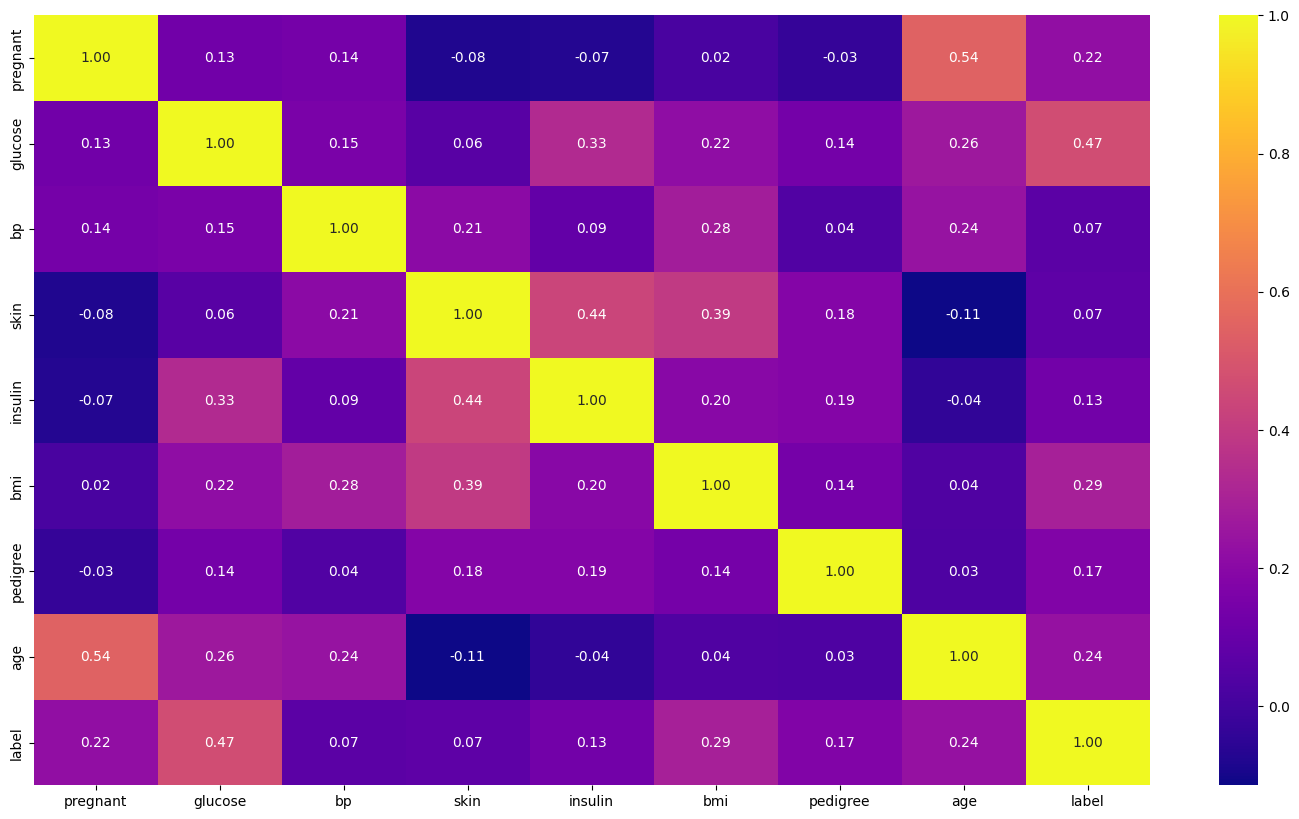

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (18,10))
sns.heatmap(dataset.corr(), cmap= 'plasma',annot = True , fmt='.2f' )

### Split dataset in features (`x`) and target (`y`) variable

In [ ]:
x=pd.DataFrame(dataset,columns=['pregnant','glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age'])
y=dataset.label.values.reshape(-1,1)

### Perform `train_test_split` with 80-20

In [ ]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size= 0.20, random_state=1)

### Decision tree classifier model

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

### Checking the accuracy

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.6948051948051948

### Optimization improves the accuracy!!!
`Gini` vs `Entropy`

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) # entropy and gini

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7987012987012987


### Create Decision Tree

**Install these libraries for decision tree visualization**   
```
!pip install six

!pip install graphviz

!pip install pydotplus
```

**Note**: You might need to do some adjustments with `graphviz` tool on Windows.  
For mac: `brew install graphviz`

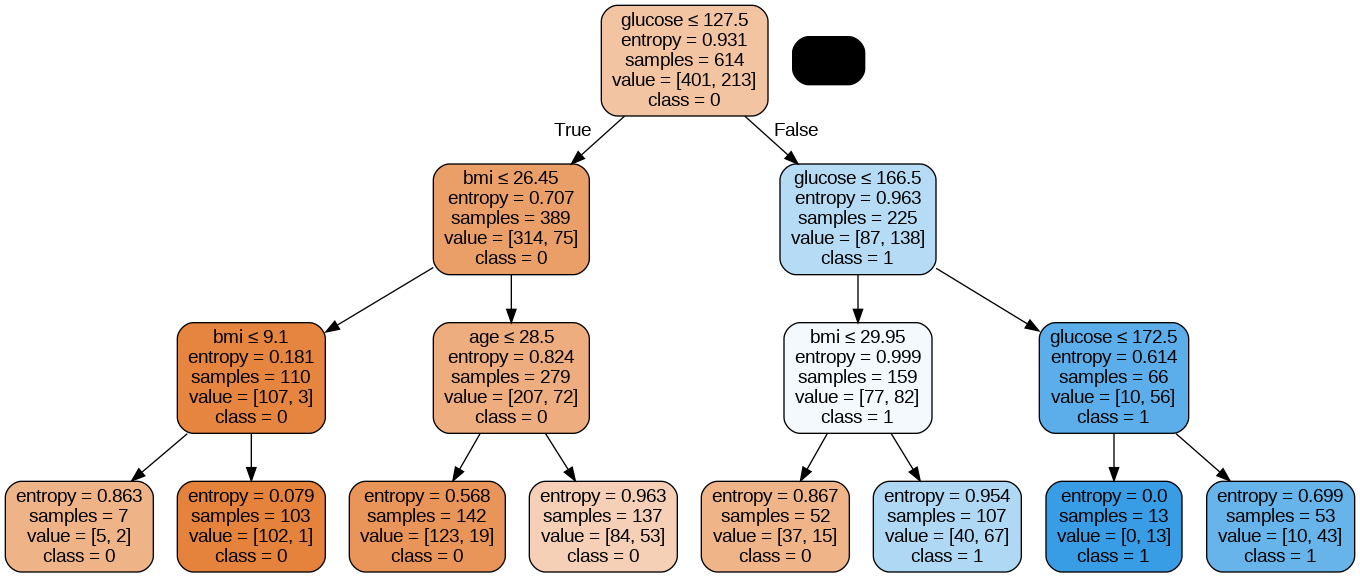

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names =['pregnant','glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

##Code Description:

The provided Python code is used to:

Train a decision tree classifier using scikit-learn.
Visualize the decision tree using export_graphviz and pydotplus.
Save the visualized decision tree as a PNG image (diabetes.png).

##Visualization Explaination

Here, The class associated with the leaf node is the prediction (either 0 or 1 in the case of diabetes). After making a series of splits, the decision tree reaches a leaf node, where a final prediction is made. In this case, the outcome could be a binary class (0 for non-diabetic, 1 for diabetic).  

1. Root Node (Top Level):
Condition: glucose ≤ 127.5
The decision tree begins with the glucose level as the primary feature for splitting the dataset.
Entropy: A measure of impurity (here, 0.931 indicates significant uncertainty in classification at this level).
Samples: 614 samples in total.
Value: [401, 213] indicates 401 samples in class 0 and 213 samples in class 1.
Class: Predicted as class 0 at this node (majority class).
2. Branching Based on Conditions:
The decision tree splits data further based on feature thresholds, reducing entropy (impurity) at each step.

Left Subtree (True, glucose ≤ 127.5):

This branch processes 389 samples where glucose is below or equal to 127.5.
Next Split: bmi ≤ 26.45.
Right Subtree (False, glucose > 127.5):

This branch processes 225 samples where glucose is greater than 127.5.
Next Split: glucose ≤ 166.5.
3. Leaf Nodes (Bottom Level):
These are the terminal nodes where no further splitting occurs, and the class label is assigned based on the majority of samples.
Example:
A leaf on the leftmost branch: entropy = 0.079, value = [102, 1], class = 0.
A leaf on the rightmost branch: entropy = 0.0, value = [0, 13], class = 1.
Color Coding:
Orange Nodes: Represent majority class 0 (non-diabetic).
Blue Nodes: Represent majority class 1 (diabetic).
The intensity of the color reflects the purity of the node (darker = lower entropy/purity).

##Conclusion

In this decision tree, the factors (features) that affect the prediction of diabetes (class 1) or non-diabetes (class 0) are determined by the splitting conditions at each node. The tree ranks the features based on their importance for reducing uncertainty (entropy) and making predictions. Here are the key factors and their influence in this case:

1. Glucose:
Most significant factor: The tree starts by splitting on glucose ≤ 127.5, meaning glucose levels are the primary determinant of whether someone is diabetic or not.
Higher glucose levels generally lead to a prediction of diabetes (class 1).
Lower glucose levels lead to a prediction of non-diabetes (class 0).
2. BMI (Body Mass Index):
The second most important factor in the tree.
For lower glucose levels, bmi ≤ 26.45 helps distinguish between diabetic and non-diabetic outcomes.
For higher glucose levels, bmi ≤ 29.95 further refines predictions for diabetes (class 1).
3. Age:
Age plays a role after BMI in refining predictions.
For individuals with bmi > 26.45 and low glucose levels, age (age ≤ 28.5) is considered.
4. Other Features:
Features like blood pressure (bp), skin thickness, insulin levels, and pedigree were available in the dataset, but they were not selected by the tree for splitting. This indicates that they had less predictive value for this particular decision tree.

####Summary of Factors Influencing Diabetes (Class 1):
High glucose levels: If glucose > 127.5, there is a higher likelihood of diabetes.
Higher BMI: BMI thresholds (26.45 and 29.95) play a critical role, especially for samples with intermediate glucose levels.
Age: Younger individuals with lower BMI are less likely to be diabetic compared to older individuals.


####Summary of Factors Influencing Non-Diabetes (Class 0):
Low glucose levels: Glucose ≤ 127.5 strongly indicates non-diabetes.
Low BMI: BMI ≤ 26.45 further confirms non-diabetes for individuals with low glucose levels.
Young age: Younger individuals are less likely to be diabetic.






